### Load and explore the dataset

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
print(f'iris.data.shape    = {iris.data.shape}')
print(f'iris.target.shape  = {iris.target.shape}')
print(f'iris.target_names  = {iris.target_names}')
print(f'iris.feature_names = {iris.feature_names}')

iris.data.shape    = (150, 4)
iris.target.shape  = (150,)
iris.target_names  = ['setosa' 'versicolor' 'virginica']
iris.feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Create a Pandas dataframe

In [4]:
import pandas as pd

pd.set_option('max_columns', 5)
pd.set_option('display.width', None)

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
pd.set_option('precision', 2)
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [6]:
iris_df['species'].describe()

count           150
unique            3
top       virginica
freq             50
Name: species, dtype: object

### Visualize the dataset

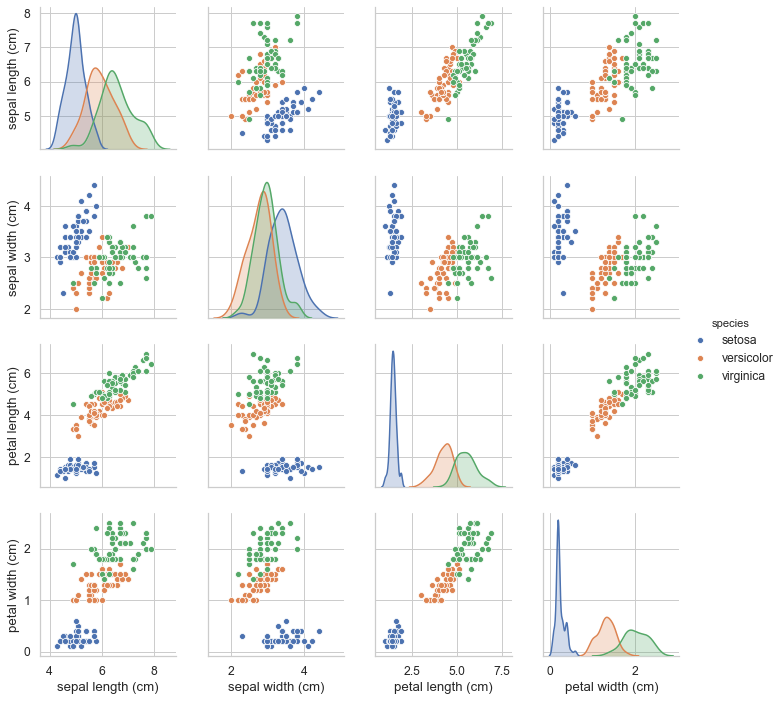

In [7]:
%matplotlib inline
import seaborn as sns

sns.set(font_scale=1.1)
sns.set_style('whitegrid')

grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4], hue='species')

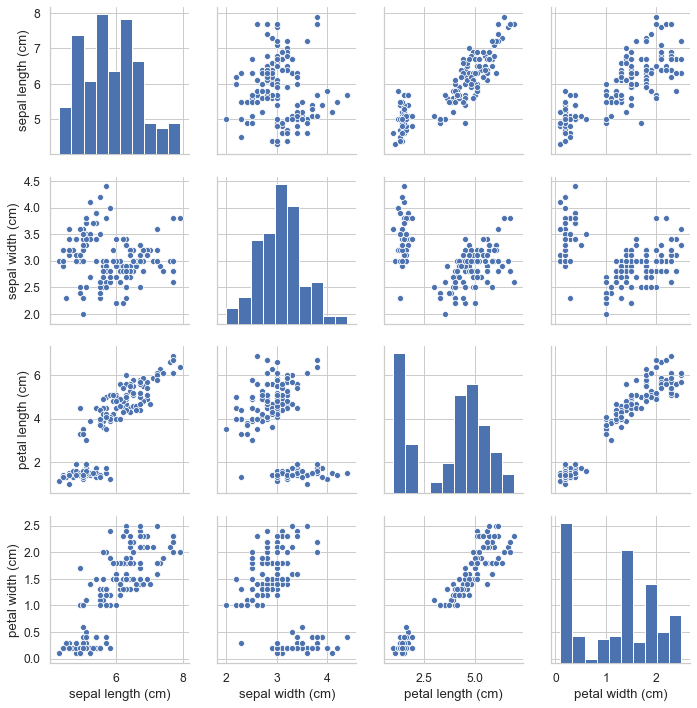

In [8]:
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4])

### Create a k-means estimator and fit the model

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=11)  # find three clusters
kmeans.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=11, tol=0.0001, verbose=0)

### Compare the k-means labels to the Iris dataset’s target values

In [10]:
print(kmeans.labels_[0:50])  # setosa

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [11]:
print(kmeans.labels_[50:100])  # versicolor

[0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [12]:
print(kmeans.labels_[100:150])  # virginica

[2 0 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2
 2 0 2 2 2 0 2 2 2 0 2 2 0]


### Dimensionality reduction with Principal Component Analysis (PCA)

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=11)  # reduce to two components
pca.fit(iris.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=11,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
iris_pca = pca.transform(iris.data)
iris_pca.shape

(150, 2)

### Visualize the reduced data

In [22]:
iris_pca_df = pd.DataFrame(iris_pca, 
                           columns=['Component 1', 'Component 2'])
iris_pca_df['species'] = iris_df.species

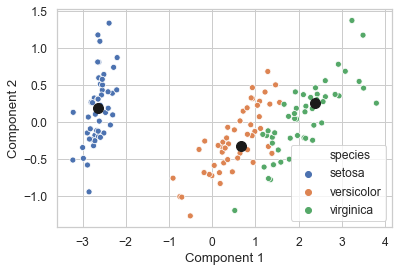

In [25]:
import matplotlib.pyplot as plt

axes = sns.scatterplot(data=iris_pca_df, hue='species', legend='brief', 
                       x='Component 1', y='Component 2') 

iris_centers = pca.transform(kmeans.cluster_centers_)
dots = plt.scatter(iris_centers[:,0], iris_centers[:,1], s=100, c='k')

In [17]:
##########################################################################
# (C) Copyright 2019 by Deitel & Associates, Inc. and                    #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
# DISCLAIMER: The authors and publisher of this book have used their     #
# best efforts in preparing the book. These efforts include the          #
# development, research, and testing of the theories and programs        #
# to determine their effectiveness. The authors and publisher make       #
# no warranty of any kind, expressed or implied, with regard to these    #
# programs or to the documentation contained in these books. The authors #
# and publisher shall not be liable in any event for incidental or       #
# consequential damages in connection with, or arising out of, the       #
# furnishing, performance, or use of these programs.                     #
##########################################################################
